In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import pickle
import json

In [2]:
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )
loan_data.drop(['Unnamed: 0', 'Loan_ID'], axis =1, inplace =True)
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
486,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1
487,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1
488,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1
489,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0


In [3]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')
test_data.drop(['Loan_ID'], axis =1, inplace =True)
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural
...,...,...,...,...,...,...,...,...,...,...,...
118,Male,No,0,Graduate,No,4683,1915.0,185.0,360.0,1.0,Semiurban
119,Male,Yes,2,Not Graduate,No,3601,1590.0,NaN,360.0,1.0,Rural
120,Female,Yes,0,Not Graduate,No,3017,663.0,102.0,360.0,NaN,Semiurban
121,Female,No,0,Not Graduate,Yes,17263,0.0,225.0,360.0,1.0,Semiurban


In [4]:
loan_data['Loan_Status'].value_counts()

1    343
0    148
Name: Loan_Status, dtype: int64

In [5]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             481 non-null    object 
 1   Married            490 non-null    object 
 2   Dependents         482 non-null    object 
 3   Education          491 non-null    object 
 4   Self_Employed      462 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         475 non-null    float64
 8   Loan_Amount_Term   478 non-null    float64
 9   Credit_History     448 non-null    float64
 10  Property_Area      491 non-null    object 
 11  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 46.2+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

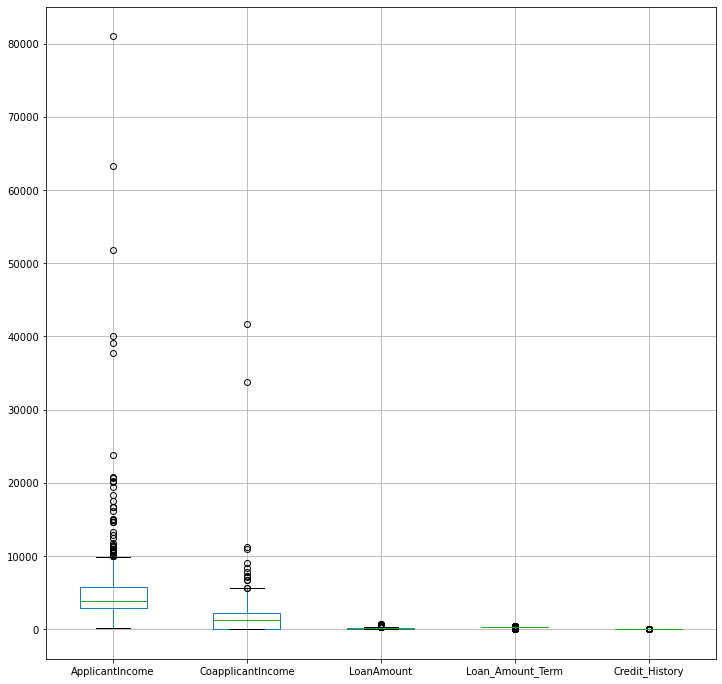

In [7]:
plt.figure(figsize=(12,12))
loan_data.boxplot(column =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term' , 'Credit_History'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

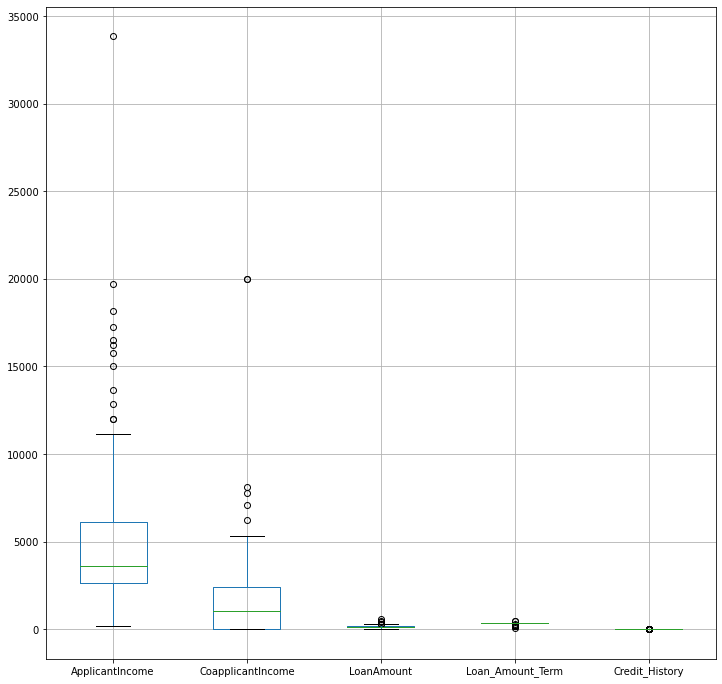

In [8]:
plt.figure(figsize=(12,12))
test_data.boxplot(column =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term' , 'Credit_History'])
plt.show

In [9]:
q1 = loan_data['ApplicantIncome'].quantile(0.25)
q3 = loan_data['ApplicantIncome'].quantile(0.75)
iqr = q3 - q1
ll = q1 - 1.5*iqr
hh = q3 + 1.5*iqr
loan_data.loc[loan_data['ApplicantIncome'] > hh,'ApplicantIncome'] = hh

q1 = loan_data['CoapplicantIncome'].quantile(0.25)
q3 = loan_data['CoapplicantIncome'].quantile(0.75)
iqr = q3 - q1
ll = q1 - 1.5*iqr
hh = q3 + 1.5*iqr
loan_data.loc[loan_data['CoapplicantIncome'] > hh,'CoapplicantIncome'] = hh

q1 = loan_data['LoanAmount'].quantile(0.25)
q3 = loan_data['LoanAmount'].quantile(0.75)
iqr = q3 - q1
ll = q1 - 1.5*iqr
hh = q3 + 1.5*iqr
loan_data.loc[loan_data['LoanAmount'] > hh,'LoanAmount'] = hh

In [10]:
q1 = test_data['ApplicantIncome'].quantile(0.25)
q3 = test_data['ApplicantIncome'].quantile(0.75)
iqr = q3 - q1
ll = q1 - 1.5*iqr
hh = q3 + 1.5*iqr
test_data.loc[test_data['ApplicantIncome'] > hh,'ApplicantIncome'] = hh

q1 = test_data['CoapplicantIncome'].quantile(0.25)
q3 = test_data['CoapplicantIncome'].quantile(0.75)
iqr = q3 - q1
ll = q1 - 1.5*iqr
hh = q3 + 1.5*iqr
test_data.loc[test_data['CoapplicantIncome'] > hh,'CoapplicantIncome'] = hh

q1 = test_data['LoanAmount'].quantile(0.25)
q3 = test_data['LoanAmount'].quantile(0.75)
iqr = q3 - q1
ll = q1 - 1.5*iqr
hh = q3 + 1.5*iqr
test_data.loc[test_data['LoanAmount'] > hh,'LoanAmount'] = hh

In [11]:
loan_data.isnull().sum()

Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#handling missing values

loan_data_values = {'Credit_History':1.0, 'Gender':loan_data['Gender'].mode()[0], 'Dependents':loan_data['Dependents'].mode()[0],
                   'Married': loan_data['Married'].mode()[0], 'Self_Employed': loan_data['Self_Employed'].mode()[0],
                   'Loan_Amount_Term': loan_data['Loan_Amount_Term'].mode()[0],'LoanAmount': loan_data['LoanAmount'].median() }

test_data_values = {'Credit_History':1.0,'Gender':test_data['Gender'].mode()[0], 'Dependents':test_data['Dependents'].mode()[0],
                   'Married': test_data['Married'].mode()[0], 'Self_Employed': test_data['Self_Employed'].mode()[0],
                   'Loan_Amount_Term': test_data['Loan_Amount_Term'].mode()[0], 'LoanAmount': test_data['LoanAmount'].median()}

loan_data.fillna(value =loan_data_values, inplace = True)
test_data.fillna(value =test_data_values, inplace = True)

In [13]:
loan_data = loan_data.select_dtypes(include=np.number)
test_data = test_data.select_dtypes(include=np.number)

In [14]:
loan_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,4547.0,0.0,115.0,360.0,1.0,1
1,5703.0,0.0,130.0,360.0,1.0,1
2,4333.0,2451.0,110.0,360.0,1.0,0
3,4695.0,0.0,96.0,360.0,1.0,1
4,6700.0,1750.0,230.0,300.0,1.0,1


In [15]:
loan_data['Total_income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
loan_data['Monthly_loan_payment'] = loan_data['LoanAmount']/ loan_data['Loan_Amount_Term']
loan_data['Monthly_Balance'] = loan_data['Total_income'] - (loan_data['Monthly_loan_payment']*1000)

test_data['Total_income'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']
test_data['Monthly_loan_payment'] = test_data['LoanAmount']/ test_data['Loan_Amount_Term']
test_data['Monthly_Balance'] = test_data['Total_income'] - (test_data['Monthly_loan_payment']*1000)

<ipython-input-15-dd211af94a3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['Total_income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
<ipython-input-15-dd211af94a3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['Monthly_loan_payment'] = loan_data['LoanAmount']/ loan_data['Loan_Amount_Term']
<ipython-input-15-dd211af94a3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [16]:
loan_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_income,Monthly_loan_payment,Monthly_Balance
0,4547.0,0.0,115.0,360.0,1.0,1,4547.0,0.319444,4227.555556
1,5703.0,0.0,130.0,360.0,1.0,1,5703.0,0.361111,5341.888889
2,4333.0,2451.0,110.0,360.0,1.0,0,6784.0,0.305556,6478.444444
3,4695.0,0.0,96.0,360.0,1.0,1,4695.0,0.266667,4428.333333
4,6700.0,1750.0,230.0,300.0,1.0,1,8450.0,0.766667,7683.333333


In [17]:
test_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Monthly_loan_payment,Monthly_Balance
0,3748.0,1668.0,110.0,360.0,1.0,5416.0,0.305556,5110.444444
1,4000.0,6032.5,290.0,360.0,1.0,10032.5,0.805556,9226.944444
2,2625.0,6032.5,187.0,360.0,1.0,8657.5,0.519444,8138.055556
3,3902.0,1666.0,109.0,360.0,1.0,5568.0,0.302778,5265.222222
4,6096.0,0.0,218.0,360.0,0.0,6096.0,0.605556,5490.444444


In [18]:
#loan_dummies = pd.get_dummies(loan_data[['Gender','Dependents', 'Married', 'Self_Employed','Education', 'Property_Area']])
#test_dummies = pd.get_dummies(test_data[['Gender','Dependents', 'Married', 'Self_Employed','Education', 'Property_Area']])
#loan_data.drop(['Gender','Dependents', 'Married', 'Self_Employed','Education', 'Property_Area' ], axis = 1, inplace = True)
#test_data.drop(['Gender','Dependents', 'Married', 'Self_Employed','Education', 'Property_Area' ], axis = 1, inplace = True)
#loan_data = pd.concat([loan_data, loan_dummies], axis = 1)
#test_data = pd.concat([test_data, test_dummies], axis = 1)
#loan_data.head()

In [19]:
loan_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1, inplace = True)
test_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1, inplace = True)

C:\Users\Akinyemi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
loan_data.head()

,Credit_History,Loan_Status,Total_income,Monthly_loan_payment,Monthly_Balance
0,1.0,1,4547.0,0.319444,4227.555556
1,1.0,1,5703.0,0.361111,5341.888889
2,1.0,0,6784.0,0.305556,6478.444444
3,1.0,1,4695.0,0.266667,4428.333333
4,1.0,1,8450.0,0.766667,7683.333333


In [21]:
test_data.head()

,Credit_History,Total_income,Monthly_loan_payment,Monthly_Balance
0,1.0,5416.0,0.305556,5110.444444
1,1.0,10032.5,0.805556,9226.944444
2,1.0,8657.5,0.519444,8138.055556
3,1.0,5568.0,0.302778,5265.222222
4,0.0,6096.0,0.605556,5490.444444


In [22]:
X = loan_data.drop(['Loan_Status'],axis = 1)
y = loan_data.Loan_Status

In [23]:
X.shape

(491, 4)

In [24]:
test_data.shape

(123, 4)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

In [26]:
X_sampled, y_sampled = SMOTE(random_state = 0, sampling_strategy = 1.0).fit_sample(X_train, y_train)

In [27]:

lr = LogisticRegression()
#clf = SVC(random_state = 0, kernel = 'linear')
params = {'C': [0.4,0.5,0.6,0.7,0.8,0.9,1.0, 1.1,1.2,1.3,1.4,1.5],
          'class_weight': ['balanced', None],
          'tol': [0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.03, 0.04]
         }
#rs = RandomizedSearchCV(estimator =clf, random_state = 0, param_distributions = params, n_jobs = -1, cv = 10, verbose = 2)
pipe = Pipeline([('scaler', StandardScaler()),
                ('clf', lr)])

pipe.fit(X_sampled, y_sampled)
y_pred = pipe.predict(test_data)

In [28]:
df = pd.DataFrame({'prediction': y_pred})
df.to_csv('Loan_pred.csv', index = False)

In [29]:
#pipe['clf'].best_params_

In [30]:
f1_score(y_test, pipe.predict(X_test))

0.8590604026845637

In [31]:
accuracy_score(y_test, pipe.predict(X_test))

0.7878787878787878

In [32]:
with open('Loan_prediction_model.pickle', 'wb') as f:
    pickle.dump(lr, f)

In [33]:
columns = {'data_columns': [col.lower() for col in test_data.columns]}
with open('data_columns.json', 'w') as f:
    json.dump(columns, f)